In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Data Preparation

In [3]:
#1. Regularize the column names
df.columns = df.columns.str.capitalize().str.replace(" ", "_")

In [4]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Regularize the string columns
## First find which columns are strings
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_fuel_type      object
Engine_hp            float64
Engine_cylinders     float64
Transmission_type     object
Driven_wheels         object
Number_of_doors      float64
Market_category       object
Vehicle_size          object
Vehicle_style         object
Highway_mpg            int64
City_mpg               int64
Popularity             int64
Msrp                   int64
dtype: object

In [6]:
## Get the columns that are objects
df.dtypes[df.dtypes == "object"]

Make                 object
Model                object
Engine_fuel_type     object
Transmission_type    object
Driven_wheels        object
Market_category      object
Vehicle_size         object
Vehicle_style        object
dtype: object

In [7]:
## Get access to the indices
df.dtypes[df.dtypes == "object"].index

Index(['Make', 'Model', 'Engine_fuel_type', 'Transmission_type',
       'Driven_wheels', 'Market_category', 'Vehicle_size', 'Vehicle_style'],
      dtype='object')

In [8]:
## COnvert to a python list
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['Make',
 'Model',
 'Engine_fuel_type',
 'Transmission_type',
 'Driven_wheels',
 'Market_category',
 'Vehicle_size',
 'Vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print(df[i].nunique())
    print()

Make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

Year
[2011 2012 2013 1992 1993]
28

Engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

Engine_hp
[335. 300. 230. 320. 172.]
356

Engine_cylinders
[ 6.  4.  5.  8. 12.]
9

Transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

Number_of_doors
[ 2.  4.  3. nan]
3

Market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

Vehicle_size
['compact' 'midsize' 'large']
3

Vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

Highway_mpg
[26 28 27 25 24]
59

City_mpg
[19 20 18 17 16]
69

Popularity
[3916 3105  819  617 1013]
48

Msrp
[46135 40650 36350 29450 345

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Msrp', ylabel='Count'>

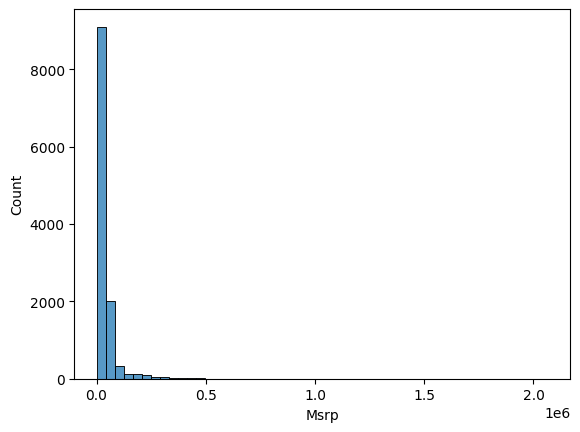

In [13]:
# Plot histogram of price
sns.histplot(df.Msrp, bins =50)

<Axes: xlabel='Msrp', ylabel='Count'>

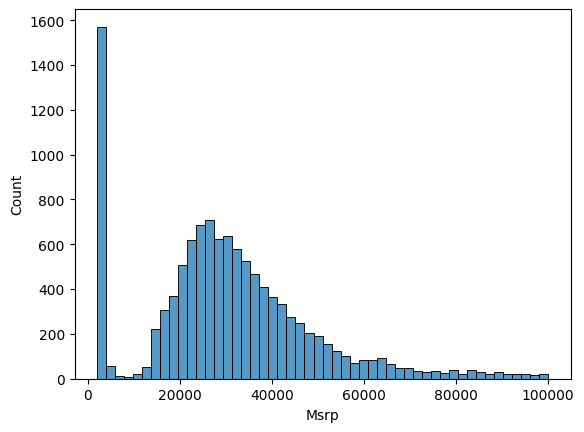

In [14]:
# Let us look at the distribution of prices less than 100k
sns.histplot(df.Msrp[df.Msrp < 100000], bins = 50)

Most of the prices are clustered around 1000. Entering this kind of data into our model will throw off the model because of the price variations. 
A way to resolve this is taking the logarithm of the values. This transforms the data into simpler units. If we have data with zeros, logarithm of zero will throw an error so we use log[x+1]. Numpy solves this for us with the function log1p.

In [15]:
price_logs = np.log1p(df.Msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: Msrp, Length: 11914, dtype: float64

<Axes: xlabel='Msrp', ylabel='Count'>

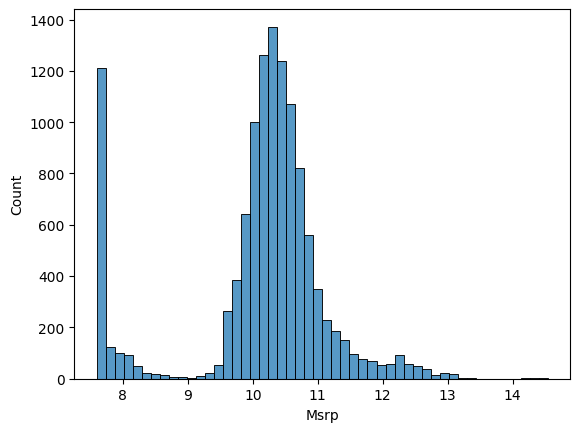

In [16]:
# Visualize
sns.histplot(price_logs, bins = 50)

In [17]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_fuel_type        3
Engine_hp              69
Engine_cylinders       30
Transmission_type       0
Driven_wheels           0
Number_of_doors         6
Market_category      3742
Vehicle_size            0
Vehicle_style           0
Highway_mpg             0
City_mpg                0
Popularity              0
Msrp                    0
dtype: int64

## Setting up validation framework

We will split the dataset into 60% training, 20% validation and 20% testing.

In [18]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n- n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [19]:
# Create a range of numbers from 0 to n
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [20]:
# Shuffle the numbers
np.random.seed(2)
rng = np.random.default_rng()
rng.shuffle(idx)

In [21]:
idx

array([10776,  4664,  4799, ...,  9308, 11729,  5792])

In [22]:
df_train = df.iloc[idx[: n_train ]]
df_val = df.iloc[idx[n_train: n_train+ n_val]]
df_test = df.iloc[idx[n_train+ n_val:]]

In [23]:
df_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
10776,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385,26730
4664,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657,2000
4799,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657,19765
8369,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259,197850
800,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376,26950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,toyota,pickup,1994,regular_unleaded,116.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,20,17,2031,2115
11347,nissan,versa,2015,regular_unleaded,109.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,31,2009,15530
7169,dodge,neon,2003,premium_unleaded_(required),150.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851,17085
2250,toyota,camry,2016,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,35,25,2031,26310


In [24]:
df_val

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
10963,toyota,tundra,2015,flex-fuel_(unleaded/e85),381.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,13,2031,47975
6219,nissan,juke,2015,premium_unleaded_(required),211.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,factory_tuner,performance",compact,4dr_hatchback,29,25,2009,30020
11585,volvo,xc60,2016,regular_unleaded,250.0,5.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,26,19,870,38100
2523,chevrolet,city_express,2015,regular_unleaded,131.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,cargo_minivan,26,24,1385,21955
7654,toyota,previa,1995,regular_unleaded,161.0,4.0,automatic,rear_wheel_drive,3.0,NaN,compact,passenger_minivan,20,16,2031,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,ford,focus_rs,2017,premium_unleaded_(recommended),350.0,4.0,manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,25,19,5657,36120
3484,dodge,dart,2014,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1851,16495
829,saab,9-3,2009,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,luxury,compact,wagon,29,19,376,31790
7293,honda,odyssey,2015,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37775


In [25]:
df_test

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
5602,ford,gt,2005,premium_unleaded_(required),550.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,19,12,5657,149995
7535,nissan,pathfinder,2017,regular_unleaded,284.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,4dr_suv,27,20,2009,32980
122,mazda,2,2014,regular_unleaded,100.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,35,29,586,16210
792,volvo,850,1997,regular_unleaded,240.0,5.0,automatic,front_wheel_drive,4.0,"factory_tuner,luxury,performance",midsize,sedan,24,17,870,2000
7426,porsche,panamera,2016,premium_unleaded_(required),310.0,6.0,automated_manual,all_wheel_drive,4.0,"luxury,performance",large,sedan,27,18,1715,82800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,ferrari,456m,2003,premium_unleaded_(required),442.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,9,2774,228625
1680,mercedes-benz,b-class_electric_drive,2015,electric,177.0,0.0,direct_drive,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,82,85,617,41450
9308,gmc,sierra_1500_hybrid,2012,regular_unleaded,332.0,8.0,automatic,four_wheel_drive,4.0,hybrid,large,crew_cab_pickup,23,20,549,43210
11729,cadillac,xlr-v,2008,premium_unleaded_(required),443.0,8.0,automatic,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,convertible,21,14,1624,100660


In [26]:
## We can reset the indices if we'd like
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [27]:
## Log transform y vector
y_train = np.log1p(df_train.Msrp.values)
y_test = np.log1p(df_test.Msrp.values)
y_val = np.log1p(df_val.Msrp.values)

In [28]:
# Remove price from X matrix
del df_train["Msrp"]
del df_test["Msrp"]
del df_val["Msrp"]

In [29]:
df_train


,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385
1,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657
3,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259
4,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,toyota,pickup,1994,regular_unleaded,116.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,20,17,2031
7146,nissan,versa,2015,regular_unleaded,109.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,31,2009
7147,dodge,neon,2003,premium_unleaded_(required),150.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851
7148,toyota,camry,2016,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,35,25,2031


# Linear Regression Normal equation
we need to multiply the feature matrix X with weights vector w to get y (the prediction for price).

g(X) = Xw ~ y
XTX is called the GRAM MATRIX and for XTX the inverse exists, because this is squared (n+1)x(n+1)


(XTX)⁻1XTXw = (XTX)⁻1XTy

(XTX)⁻1XTX = Iw

Iw = (XTX)-1XTy

That value is the closest possible solution

w = (XTX)⁻1XTy

In [30]:
# First define X
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
X= np.array(X)

In [31]:
XtX = X.T.dot(X)
XtX

array([[ 696471,   44115,  717301],
       [  44115,    7146,  118770],
       [ 717301,  118770, 6359479]])

In [32]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv

array([[ 2.35807654e-06, -1.46995131e-05,  8.55581192e-09],
       [-1.46995131e-05,  2.94560654e-04, -3.84323834e-06],
       [ 8.55581192e-09, -3.84323834e-06,  2.28057098e-07]])

In [33]:
## Computing to see if we will get an identity matrix
XtX_inv.dot(XtX).round(1)

array([[ 1., -0., -0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

we need to add a new column with ones to the feature matrix X. That is for the multiplication with w0.

In [34]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
X= np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [36]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [37]:
XtX = X.T.dot(X)

In [38]:
XtX_inv= np.linalg.inv(XtX)

In [39]:
XtX.dot(XtX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0., -0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [40]:
w= XtX_inv.dot(X.T).dot(y)
w0, w_full = w[0], w[1:] 
w0, w_full 

(np.float64(30009.252922766627),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

We can write all of this into a function

In [41]:
def train_linear_reg(X, y):
    ones = np.ones(X.shape[0])
    X= np.column_stack([ones, X])
    XtX = X.T.dot(X)
    Xtx_inv = np.linalg.inv(XtX)
    w= Xtx_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [42]:
train_linear_reg(X, y)

LinAlgError: Singular matrix

We can implement this function on the numerical values of our car df.

In [43]:
base = ['Engine_hp', 'Engine_cylinders', 'Highway_mpg', 'City_mpg', 'Popularity']
 
df_train[base].head()

,Engine_hp,Engine_cylinders,Highway_mpg,City_mpg,Popularity
0,138.0,4.0,31,24,1385
1,63.0,4.0,38,30,5657
2,160.0,4.0,40,27,5657
3,470.0,12.0,19,13,259
4,227.0,4.0,24,17,376


In [44]:
# Value extraction
X_train = df_train[base].values
X_train

array([[1.380e+02, 4.000e+00, 3.100e+01, 2.400e+01, 1.385e+03],
       [6.300e+01, 4.000e+00, 3.800e+01, 3.000e+01, 5.657e+03],
       [1.600e+02, 4.000e+00, 4.000e+01, 2.700e+01, 5.657e+03],
       ...,
       [1.500e+02, 4.000e+00, 3.200e+01, 2.500e+01, 1.851e+03],
       [1.780e+02, 4.000e+00, 3.500e+01, 2.500e+01, 2.031e+03],
       [1.900e+02, 6.000e+00, 1.600e+01, 1.200e+01, 5.490e+02]])

In [45]:
# Checking for missing values
df_train[base].isnull().sum()

Engine_hp           42
Engine_cylinders    20
Highway_mpg          0
City_mpg             0
Popularity           0
dtype: int64

In [46]:
# Filling missing values with zero
df_train[base] = df_train[base].fillna(0)
df_train[base].isnull().sum()

Engine_hp           0
Engine_cylinders    0
Highway_mpg         0
City_mpg            0
Popularity          0
dtype: int64

In [47]:
X_train = df_train[base].values
X_train

array([[1.380e+02, 4.000e+00, 3.100e+01, 2.400e+01, 1.385e+03],
       [6.300e+01, 4.000e+00, 3.800e+01, 3.000e+01, 5.657e+03],
       [1.600e+02, 4.000e+00, 4.000e+01, 2.700e+01, 5.657e+03],
       ...,
       [1.500e+02, 4.000e+00, 3.200e+01, 2.500e+01, 1.851e+03],
       [1.780e+02, 4.000e+00, 3.500e+01, 2.500e+01, 2.031e+03],
       [1.900e+02, 6.000e+00, 1.600e+01, 1.200e+01, 5.490e+02]])

In [48]:
y_train

array([10.19357922,  7.60140233,  9.89171857, ...,  9.74601469,
       10.17774238, 10.17336201])

In [49]:
w0, w = train_linear_reg(X_train, y_train)
w0, w

(np.float64(7.5012948484962365),
 array([ 9.37793057e-03, -1.24654254e-01,  4.58006270e-02, -1.12063781e-02,
        -1.39141144e-05]))

In [50]:
# y_pred = w0 + X.w
y_pred= w0 + X_train.dot(w)
y_pred

array([9.42842757, 8.9190078 , 9.95388745, ..., 9.569073  , 9.9665524 ,
       9.12587078])

<Axes: ylabel='Count'>

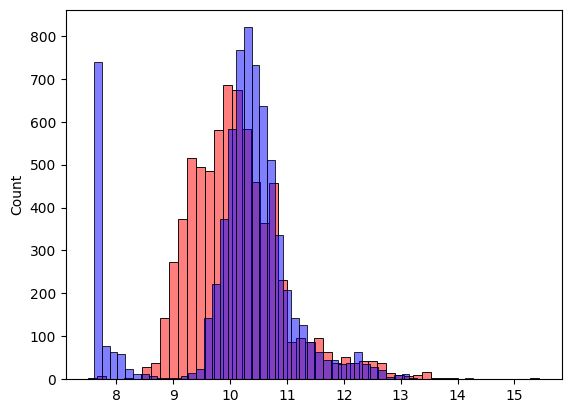

In [51]:
## Plotting model performance
sns.histplot(y_pred, color= "red", alpha = 0.5, bins= 50)
sns.histplot(y_train, color= "blue", alpha = 0.5, bins= 50)

## Model evaluation with Root Mean Squared Error (RMSE)
We have the following variables, so we can calculate the RMSE.

g(xi) – prediction for xi (observation i)
yi – actual value
m – number of different observations
–> g(xi) – yi is the difference between the prediction and the actual value
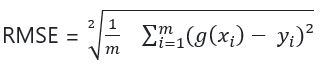![image.png](attachment:989f22d7-b13b-47a3-8c1a-af4e19f48

In [52]:
def rmse(y_pred, y):
    error = y_pred - y
    squared_error = error **2
    mean_se = squared_error.mean()
    return np.sqrt(mean_se)
    

In [53]:
rmse(y_pred, y_train)

np.float64(0.7519035467104122)

In [54]:
## Validating the model.
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [55]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

np.float64(0.7426074222532529)

## Simple feature engineering
This is the process of creating new features to train our model. Suppose we want to develop a new feature based on the existing ones in the feature matrix X. Let’s assume we want to use the year information as an age information. Let’s assume further we have year 2017.

In [56]:
df.Year.max()

np.int64(2017)

In [57]:
base = ['Engine_hp', 'Engine_cylinders', 'Highway_mpg', 'City_mpg', 'Popularity']
 
def prepare_X(df):
    df = df.copy()
     
    df['age'] = 2017 - df.Year
    features = base + ['age']
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
X_train = prepare_X(df_train)
X_train

array([[1.380e+02, 4.000e+00, 3.100e+01, 2.400e+01, 1.385e+03, 1.000e+00],
       [6.300e+01, 4.000e+00, 3.800e+01, 3.000e+01, 5.657e+03, 2.400e+01],
       [1.600e+02, 4.000e+00, 4.000e+01, 2.700e+01, 5.657e+03, 0.000e+00],
       ...,
       [1.500e+02, 4.000e+00, 3.200e+01, 2.500e+01, 1.851e+03, 1.400e+01],
       [1.780e+02, 4.000e+00, 3.500e+01, 2.500e+01, 2.031e+03, 1.000e+00],
       [1.900e+02, 6.000e+00, 1.600e+01, 1.200e+01, 5.490e+02, 1.300e+01]])

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5226514404483392)

<Axes: ylabel='Count'>

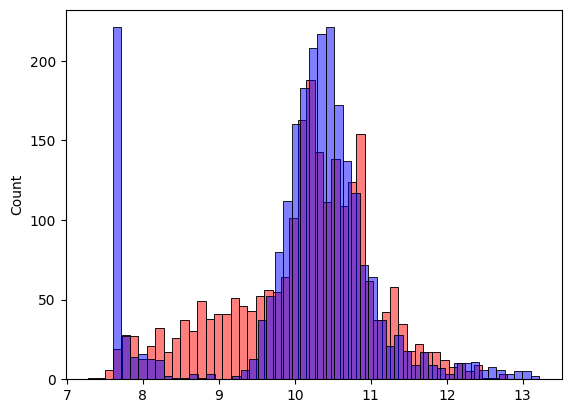

In [59]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## Categorical variables
These are variables that are categories (typically strings). Here: make, model, engine_fuel_type, transmission_type, driven_wheels, market_category, vehicle_size, vehicle_style. We can use categorical variables to train our model by one hot encoding.

In [60]:
## Implementing One hot encoding on the number of doors
df_train.Number_of_doors

0       4.0
1       2.0
2       4.0
3       4.0
4       4.0
       ... 
7145    2.0
7146    4.0
7147    4.0
7148    4.0
7149    3.0
Name: Number_of_doors, Length: 7150, dtype: float64

In [61]:
df_train['num_doors_2'] = (df_train.Number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.Number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.Number_of_doors == 4).astype('int')

In [62]:
df_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385,0,0,1
1,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657,1,0,0
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657,0,0,1
3,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259,0,0,1
4,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,toyota,pickup,1994,regular_unleaded,116.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,20,17,2031,1,0,0
7146,nissan,versa,2015,regular_unleaded,109.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,31,2009,0,0,1
7147,dodge,neon,2003,premium_unleaded_(required),150.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851,0,0,1
7148,toyota,camry,2016,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,35,25,2031,0,0,1


In [63]:
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

In [65]:
df_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385
1,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657
3,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259
4,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,toyota,pickup,1994,regular_unleaded,116.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,20,17,2031
7146,nissan,versa,2015,regular_unleaded,109.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,31,2009
7147,dodge,neon,2003,premium_unleaded_(required),150.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851
7148,toyota,camry,2016,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,35,25,2031


In [67]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.Year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.Number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[138.,   4.,  31., ...,   0.,   0.,   1.],
       [ 63.,   4.,  38., ...,   1.,   0.,   0.],
       [160.,   4.,  40., ...,   0.,   0.,   1.],
       ...,
       [150.,   4.,  32., ...,   0.,   0.,   1.],
       [178.,   4.,  35., ...,   0.,   0.,   1.],
       [190.,   6.,  16., ...,   0.,   1.,   0.]])

In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5229052850194205)

In [70]:
df.Make.value_counts().head()

Make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [71]:
df.Make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='Make')

In [72]:
makes = list(df.Make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [75]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.Year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.Number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.Make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.511319938055405)

In [79]:
categorical_variables = [
    'Make', 'Engine_fuel_type', 'Transmission_type', 'Driven_wheels', 
    'Market_category', 'Vehicle_size', 'Vehicle_style']

In [80]:
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [81]:
categories

{'Make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'Engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'Transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'Driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'Market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'Vehicle_size': ['compact', 'midsize', 'large'],
 'Vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [82]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.Year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.Number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(23.05641961526532)

## Regularization
This is a way to solve the problem of duplicated columns in our data. We’re controlling the weights that they don’t grow too much.

In [85]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.45589352145897183)

## Tuning the model
This involves finding the best regularization parameter for our linear regression model. We realized that the parameter r affects the quality of our model and now we try to find the best value for this r.

In [90]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  -2570998008304265.5 rmse:  23.05641961526532
reg parameter:  1e-05 bias term:  9.267878493314882 rmse:  0.4558928166451671
reg parameter:  0.0001 bias term:  6.775851498643649 rmse:  0.4558928238469724
reg parameter:  0.001 bias term:  6.7603513839078575 rmse:  0.45589352145897183
reg parameter:  0.01 bias term:  6.7482494526911525 rmse:  0.4559005294765017
reg parameter:  0.1 bias term:  6.636978851927486 rmse:  0.45597936196154615
reg parameter:  1 bias term:  5.926976654682244 rmse:  0.45722971471430934
reg parameter:  10 bias term:  4.279487614326721 rmse:  0.47522679236164783


## Using the model
What we did so far is, we trained our model on training dataset and applied the best model on validation dataset. To check the model performance we calculated the RMSE. What we want to do now is to train our final model on both training dataset and validation dataset. We call this FULL TRAIN. After that we make the final evaluation on the test dataset to make sure that our model works fine and check what is the value for RMSE. 

In [91]:
df_full_train = pd.concat([df_train, df_val])

In [92]:
df_full_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385
1,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657
3,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259
4,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,ford,focus_rs,2017,premium_unleaded_(recommended),350.0,4.0,manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,25,19,5657
2378,dodge,dart,2014,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1851
2379,saab,9-3,2009,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,luxury,compact,wagon,29,19,376
2380,honda,odyssey,2015,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202


In [93]:
df_full_train = df_full_train.reset_index(drop= True)
df_full_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385
1,ford,festiva,1993,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,30,5657
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,flex_fuel",compact,4dr_hatchback,40,27,5657
3,aston_martin,rapide,2010,premium_unleaded_(required),470.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,19,13,259
4,saab,9-2x,2005,premium_unleaded_(required),227.0,4.0,manual,all_wheel_drive,4.0,"luxury,performance",compact,wagon,24,17,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,ford,focus_rs,2017,premium_unleaded_(recommended),350.0,4.0,manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,25,19,5657
9528,dodge,dart,2014,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1851
9529,saab,9-3,2009,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,luxury,compact,wagon,29,19,376
9530,honda,odyssey,2015,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202


In [94]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.19357922,  7.60140233,  9.89171857, ..., 10.36693851,
       10.53942926, 10.10614264])

In [95]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[138.,   4.,  31., ...,   0.,   0.,   0.],
       [ 63.,   4.,  38., ...,   0.,   0.,   0.],
       [160.,   4.,  40., ...,   0.,   0.,   1.],
       ...,
       [210.,   4.,  29., ...,   0.,   0.,   0.],
       [248.,   6.,  28., ...,   0.,   0.,   0.],
       [190.,   6.,  18., ...,   0.,   0.,   0.]])

In [96]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(6.803162584572154),
 array([ 1.40480234e-03,  1.03680822e-01, -3.47702665e-02,  1.21800002e-02,
        -4.62032616e-05, -1.01249390e-01, -1.05449001e+00, -1.22885878e+00,
        -9.20961916e-01, -3.32554846e-02,  1.40796344e-01,  1.49993811e-02,
        -1.20879555e-01, -9.86824580e-02, -4.95593427e-01,  4.55303963e-02,
        -3.48761738e-01, -5.72040571e-01,  4.95622762e-03,  1.13556690e+00,
         9.55169444e-01,  1.18875998e+00,  2.92142684e+00,  6.00353425e-01,
         1.79133784e+00,  1.65393905e+00,  1.73688732e+00,  1.62083446e+00,
        -9.66496742e-02,  3.08807554e-02, -4.53300666e-02, -2.49020386e-02,
         2.75005395e-02,  2.34479428e+00,  2.22536686e+00,  2.23271283e+00,
         3.90490773e-02,  5.40963367e-02,  2.40926585e-01,  3.77799690e-01,
        -1.18537305e-01]))

In [97]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.5074534277334537


## Using the model
This means
- Extracting all the features (getting feature vector of the car)
- Applying our final model to this feature vector & predicting the price

In [100]:
#Feature Extraction
car = df_test.iloc[20].to_dict()
car

{'Make': 'chevrolet',
 'Model': 'sonic',
 'Year': 2017,
 'Engine_fuel_type': 'regular_unleaded',
 'Engine_hp': 138.0,
 'Engine_cylinders': 4.0,
 'Transmission_type': 'manual',
 'Driven_wheels': 'front_wheel_drive',
 'Number_of_doors': 4.0,
 'Market_category': 'hatchback',
 'Vehicle_size': 'compact',
 'Vehicle_style': '4dr_hatchback',
 'Highway_mpg': 39,
 'City_mpg': 28,
 'Popularity': 1385}

In [103]:
df_small = pd.DataFrame([car])
df_small

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,chevrolet,sonic,2017,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,39,28,1385


In [104]:
X_small = prepare_X(df_small)

In [105]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r= 0.001)
y_pred = w0 + X_small.dot(w)
y_pred

array([9.88321066])

In [106]:
# y_pred is in the log+1 transformed state so we have to convert.
np.expm1(y_pred)

array([19597.54596381])

In [109]:
y_car = y_test[20]
y_car

np.float64(9.889439336810069)

In [110]:
np.expm1(y_car)

np.float64(19720.0)